In [1]:
%pip install lenskit

Note: you may need to restart the kernel to use updated packages.


In [2]:
%%!
wget -q -O ml-1m.zip http://files.grouplens.org/datasets/movielens/ml-1m.zip
unzip -f ml-1m.zip

["'wget' is not recognized as an internal or external command,",
 'operable program or batch file.']

In [29]:
from lenskit.datasets import MovieLens
from lenskit import batch, topn, util
from lenskit import crossfold as xf
from lenskit.algorithms import Recommender, als, item_knn as knn
from lenskit import topn

In [30]:
import pandas as pd
import tqdm

In [31]:
mllatestsmall = MovieLens('ml-latest-small\ml-latest-small')
ratings = mllatestsmall.ratings
ratings.drop(['timestamp'], axis=1, inplace=True)
ratings.head()
print(len(ratings))

100836


In [32]:
import lenskit.crossfold as xf
print(ratings)
# ratings = data.rename(columns={'user_id': 'user', 'item_id': 'item'})
# for splitting by time: xf.LastN(10)
for i, tp in enumerate(xf.partition_users(ratings, 1, xf.SampleFrac(0.1))):
    tp.train.to_csv(r'C:\Users\fleur\Thesis B3\RQ0\RobustnessOfMetaMF-master\RobustnessOfMetaMF-master\ThesisData\ml-latest-small\ml-latest-small\ml-latest-small.trainval.rating', index = False)
    trainVal = tp.train
    tp.test.to_csv(r'C:\Users\fleur\Thesis B3\RQ0\RobustnessOfMetaMF-master\RobustnessOfMetaMF-master\ThesisData\ml-latest-small\ml-latest-small\ml-latest-small.test.rating', index = False)
    test = tp.test
print(len(test))
print(len(trainVal))

        user    item  rating
0          1       1     4.0
1          1       3     4.0
2          1       6     4.0
3          1      47     5.0
4          1      50     5.0
...      ...     ...     ...
100831   610  166534     4.0
100832   610  168248     5.0
100833   610  168250     5.0
100834   610  168252     5.0
100835   610  170875     3.0

[100836 rows x 3 columns]
10093
90743


In [33]:
for i, tp in enumerate(xf.partition_users(trainVal, 1, xf.SampleFrac(0.1))):
    tp.train.to_csv(r'C:\Users\fleur\Thesis B3\RQ0\RobustnessOfMetaMF-master\RobustnessOfMetaMF-master\ThesisData\ml-latest-small\ml-latest-small\ml-latest-small.train.rating', index = False)
    train = tp.train
    tp.test.to_csv(r'C:\Users\fleur\Thesis B3\RQ0\RobustnessOfMetaMF-master\RobustnessOfMetaMF-master\ThesisData\ml-latest-small\ml-latest-small\ml-latest-small.valid.rating', index = False)
    val = tp.test
print(len(val))
print(len(train))
print(len(train)+len(val))

9071
81672
90743


In [34]:
#ratings_test = ratings.sample(frac=0.10)
#ratings_valid = (ratings.drop(ratings_test.index)).sample(frac=0.10)
#ratings_train = ratings.drop(ratings_valid.index)
#ratings_train = ratings_train.drop(ratings_test.index)

print(train.head())
print(val.head())
print(test.head())
print(len(train))
print(len(val))
print(len(test))
print(len(test)+len(val)+len(train))

   user  item  rating
0     1     1     4.0
1     1     3     4.0
2     1     6     4.0
3     1    47     5.0
4     1    50     5.0
     user  item  rating
59      1  1060     4.0
211     1  3439     4.0
49      1  1009     3.0
181     1  2761     5.0
91      1  1348     4.0
     user  item  rating
160     1  2478     4.0
95      1  1445     3.0
33      1   592     4.0
7       1   110     4.0
64      1  1092     5.0
81672
9071
10093
100836


In [8]:
ratings_test.to_csv(r'C:\Users\fleur\Thesis B3\RQ0\RobustnessOfMetaMF-master\RobustnessOfMetaMF-master\ThesisData\ml-100k\ml-100k\ml-100k.test.rating', header=None, index=None, sep=' ', mode='a')
ratings_valid.to_csv(r'C:\Users\fleur\Thesis B3\RQ0\RobustnessOfMetaMF-master\RobustnessOfMetaMF-master\ThesisData\ml-100k\ml-100k\ml-100k.valid.rating', header=None, index=None, sep=' ', mode='a')
ratings_train.to_csv(r'C:\Users\fleur\Thesis B3\RQ0\RobustnessOfMetaMF-master\RobustnessOfMetaMF-master\ThesisData\ml-100k\ml-100k\ml-100k.train.rating', header=None, index=None, sep=' ', mode='a')

In [87]:
print(ratings.head())
test = ratings.copy()
test.drop(['item', 'rating', 'timestamp'], axis=1, inplace=True)
print(test.head())
sort = test.sort_values(test.columns[0], ascending = True)
sort2 = sort.drop_duplicates(subset=['user'], keep='first')
print(sort2)
sort2.to_csv(r'C:\Users\fleur\Thesis B3\RQ0\RobustnessOfMetaMF-master\RobustnessOfMetaMF-master\ThesisData\ml-latest-small\ml-latest-small\mllatsmall.userlist', header=None, index=None, sep=' ', mode='a')

   user  item  rating  timestamp
0     1     1     4.0  964982703
1     1     3     4.0  964981247
2     1     6     4.0  964982224
3     1    47     5.0  964983815
4     1    50     5.0  964982931
   user
0     1
1     1
2     1
3     1
4     1
        user
0          1
249        2
289        3
446        4
548        5
...      ...
98105    606
98605    607
99214    608
99518    609
100404   610

[610 rows x 1 columns]


In [6]:
print(ratings.head())
test1 = ratings.copy()
test1.drop(['user', 'rating'], axis=1, inplace=True)
print(test1.head())
new_sort = test1.sort_values(test1.columns[0], ascending = True)
new_sort2 = new_sort.drop_duplicates(subset=['item'], keep='first')
print(new_sort2)
new_sort2.to_csv(r'C:\Users\fleur\Thesis B3\RQ0\RobustnessOfMetaMF-master\RobustnessOfMetaMF-master\ThesisData\ml-100k\ml-100k\ml-100k.itemlist', header=None, index=None, sep=' ', mode='a')

   user  item  rating
0   196   242     3.0
1   186   302     3.0
2    22   377     1.0
3   244    51     2.0
4   166   346     1.0
   item
0   242
1   302
2   377
3    51
4   346
       item
25741     1
50602     2
24805     3
45328     4
33158     5
...     ...
75323  1678
67302  1679
80394  1680
92329  1681
95376  1682

[1682 rows x 1 columns]


In [17]:
algo_ii = knn.ItemItem(20)
algo_als = als.BiasedMF(50)

In [21]:
def eval(aname, algo, train, test):
    fittable = util.clone(algo)
    fittable = Recommender.adapt(fittable)
    fittable.fit(train)
    users = test.user.unique()
    # now we run the recommender
    recs = batch.recommend(fittable, users, 100)
    # add the algorithm name for analyzability
    recs['Algorithm'] = aname
    return recs

all_recs = []
test_data = []
for train, test in xf.partition_users(ratings[['user', 'item', 'rating']], 5, xf.SampleFrac(0.2)):
    test_data.append(test)
    all_recs.append(eval('ItemItem', algo_ii, train, test))
    all_recs.append(eval('ALS', algo_als, train, test))

In [22]:
all_recs = pd.concat(all_recs, ignore_index=True)
all_recs.head()

,item,score,user,rank,Algorithm
0,318,4.861395,9,1,ItemItem
1,3245,4.834998,9,2,ItemItem
2,1198,4.780550,9,3,ItemItem
3,557,4.695896,9,4,ItemItem
4,53,4.656688,9,5,ItemItem


In [23]:
test_data = pd.concat(test_data, ignore_index=True)

In [24]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.ndcg)
results = rla.compute(all_recs, test_data)
results.head()

nrecs      ndcg
Algorithm user                 
ItemItem  9       100  0.243856
          11      100  0.126639
          13      100  0.077967
          17      100  0.095722
          34      100  0.172689

In [25]:
results.groupby('Algorithm').ndcg.mean()

Algorithm
ALS         0.102209
ItemItem    0.075949
Name: ndcg, dtype: float64

<AxesSubplot:xlabel='Algorithm'>

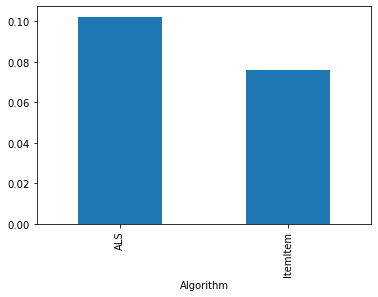

In [26]:
results.groupby('Algorithm').ndcg.mean().plot.bar()

In [27]:
test_data.to_csv(r'C:\Users\fleur\Thesis B3\RQ0\RobustnessOfMetaMF-master\RobustnessOfMetaMF-master\ThesisData\ml-1m\ml-1m\test_data.txt', header=None, index=None, sep=' ', mode='a')

In [28]:
all_recs.to_csv(r'C:\Users\fleur\Thesis B3\RQ0\RobustnessOfMetaMF-master\RobustnessOfMetaMF-master\ThesisData\ml-1m\ml-1m\all_recs.txt', header=None, index=None, sep=' ', mode='a')

In [29]:
all_recs = []
train_data = []
for train, test in xf.partition_users(ratings[['user', 'item', 'rating']], 1, xf.SampleFrac(0.8)):
    train_data.append(test)
    all_recs.append(eval('ItemItem', algo_ii, train, test))
    all_recs.append(eval('ALS', algo_als, train, test))

In [35]:
train_data = pd.concat(train_data, ignore_index=True)
train_data.to_csv(r'C:\Users\fleur\Thesis B3\RQ0\RobustnessOfMetaMF-master\RobustnessOfMetaMF-master\ThesisData\ml-1m\ml-1m\train_data.txt', header=None, index=None, sep=' ', mode='a')